In [ ]:
'''
This notebook generates the figures for immune dataset.
 - Figure 4. 2D TSNE visualization of the features learned by SigPrimedNet for a test split of the Immune dataset. 
    The cell types b, e, mo, n, nk, sp, and t refer to 
            B cells, erythrocytes, monocytes, neutrophils, NK cells, CD34+ HSPCs, and T cells, respectively.
'''

In [1]:
#!/usr/bin/env python

import os
import sys
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
os.chdir(ROOT_DIR)
sys.path.append(ROOT_DIR)
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [2]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tensorflow import keras
SEED=91
np.random.seed(SEED)
# importing scripts in scripts folder
from scripts import config as src

FIGURE_TITLE_SIZE = 18
SUBPLOT_TITLE_SIZE = 14
LEGEND_TITLE_SIZE = 12
FONT_SIZE = 10

plt.rc('font', size=16) # controls default text sizes
plt.rc('axes', titlesize=SUBPLOT_TITLE_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=LEGEND_TITLE_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=LEGEND_TITLE_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=LEGEND_TITLE_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_TITLE_SIZE) # legend fontsize
plt.rc('legend', title_fontsize=SUBPLOT_TITLE_SIZE) # legend fontsize
plt.rc('figure', titlesize=FIGURE_TITLE_SIZE) # fontsize of the figure title

**** scripts/config.py IMPORTED!!!
**** PROJECT FOLDER ,  /home/pgundogdu/projects/signalization_prior_knowledge_based_nn


In [3]:
def convert_to_tsne(X1, y1, X2, y2, model1, model2, info1, info2):
    np.random.seed(SEED)
    df_encoding_1 = pd.DataFrame(model1.predict(X1))
    df_encoding_2 = pd.DataFrame(model2.predict(X2))
    tsne = TSNE()

    df_tsne_1_array = tsne.fit_transform(np.array(df_encoding_1))
    df_tsne_1 = pd.DataFrame(df_tsne_1_array, columns=['tsne1', 'tsne2'])
    df_tsne_1['cell_type'] = y1
    df_tsne_1['dataset'] = info1

    df_tsne_2_array = tsne.fit_transform(np.array(df_encoding_2))
    df_tsne_2 = pd.DataFrame(df_tsne_2_array, columns=['tsne1', 'tsne2'])
    df_tsne_2['cell_type'] = y2
    df_tsne_2['dataset'] = info2

    df_encoding = pd.concat([df_tsne_1, df_tsne_2]).reset_index(drop=True)
    return df_encoding

## IMMUNE

In [4]:
# reading dataset
split = 'train_test_split'
experiment = 'exper_immune'
loc_read = glob.glob(os.path.join(src.DIR_MODELS, experiment, f'{split}*'))[0]

df_immune = pd.read_pickle('./data/processed/exper_immune/immune_new.pck')
# df = df[df['cell_type']!='Neg.cell'].reset_index(drop=True)
X_immune = df_immune.iloc[:, :-1].values
y_ground_truth_immune = df_immune.iloc[:, -1:]

print('shape of feature and traget dataset, feature dataset, {0}, target column {1}'.format(X_immune.shape, y_ground_truth_immune.shape))

shape of feature and traget dataset, feature dataset, (9456, 19595), target column (9456, 1)


In [5]:
# the order of the legend of the plot
order_plot = list(np.unique(y_ground_truth_immune))
plot_label = dict(zip(order_plot, range(len(order_plot))))
print(plot_label)

{'b': 0, 'e': 1, 'mo': 2, 'n': 3, 'nk': 4, 'sp': 5, 't': 6}


In [6]:
# loading the encoded information for 1- and 2-layer design
model_1_layer = keras.models.load_model( glob.glob(os.path.join(loc_read, f'encoding*1_layer*'))[0] , compile=False)
model_2_layer = keras.models.load_model( glob.glob(os.path.join(loc_read, f'encoding*2_layer*'))[0] , compile=False)

In [7]:
df_encoding_immune = convert_to_tsne(X1=X_immune
                                     , y1=y_ground_truth_immune
                                     , X2=X_immune
                                     , y2=y_ground_truth_immune
                                     , model1=model_1_layer
                                     , model2=model_2_layer
                                     , info1='1_layer'
                                     , info2='2_layer')

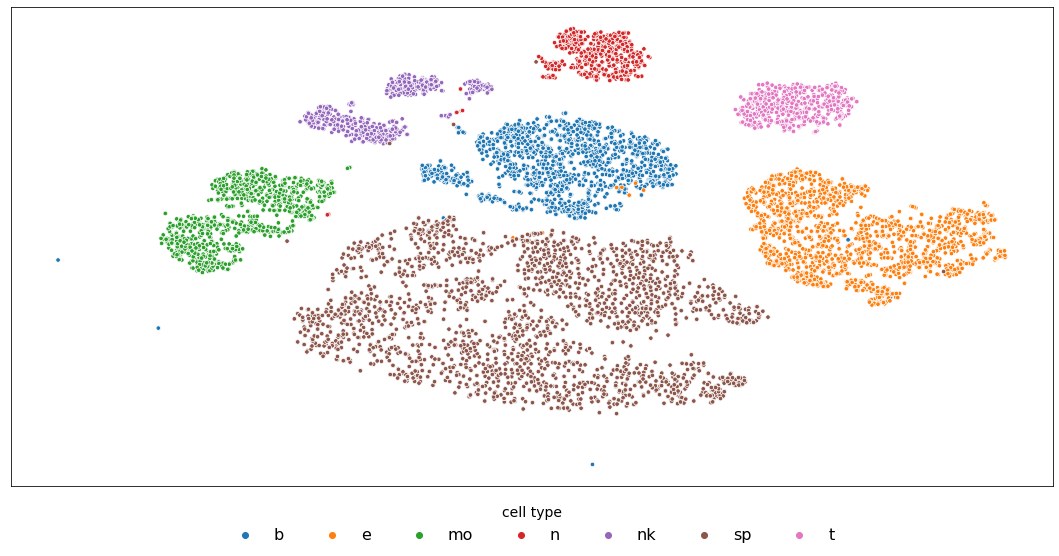

In [8]:
# Figure 4

fig, axes = plt.subplots(figsize=(15,8))
df_encoding_tsne = df_encoding_immune[df_encoding_immune['dataset']=='1_layer'].iloc[:, :-1]
df_encoding_tsne = df_encoding_tsne.sort_values(by=['cell_type'], key=lambda x: x.map(plot_label))

sns.scatterplot(data=df_encoding_tsne, x='tsne1', y='tsne2', hue='cell_type', ax=axes, marker='.', s=80)
axes.axes.get_yaxis().set_visible(False)
axes.axes.get_xaxis().set_visible(False)
legend = plt.legend(title='cell type', loc='upper center', bbox_to_anchor=(.5, -0.01), ncol=7, frameon=False,prop={'size': 16} )
plt.tight_layout();

plt.savefig(f'./reports/encoding/{experiment}/immune_ENC_1_layer_circuits_paper2.png', dpi=350, bbox_inches = 'tight')
plt.savefig(f'./reports/encoding/{experiment}/immune_ENC_1_layer_circuits_paper2.pdf', dpi=350, bbox_inches = 'tight')
plt.savefig(f'./reports/encoding/{experiment}/immune_ENC_1_layer_circuits_paper2.tiff', dpi=350, bbox_inches = 'tight')

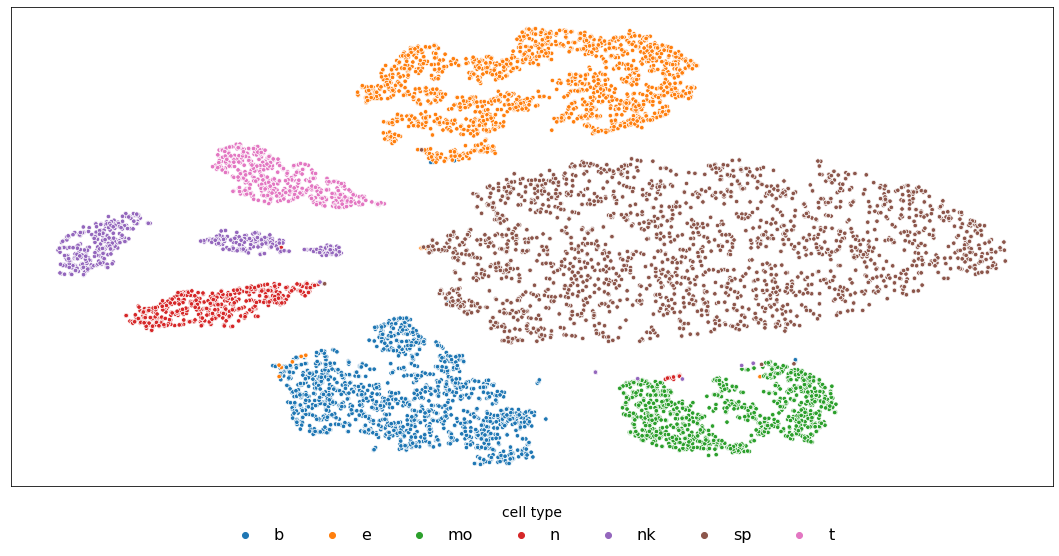

In [9]:
fig, axes = plt.subplots(figsize=(15,8))

df_encoding_tsne = df_encoding_immune[df_encoding_immune['dataset']=='2_layer'].iloc[:, :-1]
df_encoding_tsne = df_encoding_tsne.sort_values(by=['cell_type'], key=lambda x: x.map(plot_label))
sns.scatterplot(data=df_encoding_tsne, x='tsne1', y='tsne2', hue='cell_type', ax=axes, marker='.', s=80)

axes.axes.get_yaxis().set_visible(False)
axes.axes.get_xaxis().set_visible(False)
legend = plt.legend(title='cell type', loc='upper center', bbox_to_anchor=(.5, -0.01), ncol=7, frameon=False,prop={'size': 16} )
plt.tight_layout();

plt.savefig(f'./reports/encoding/{experiment}/immune_ENC_2_layer_circuits_paper2.png', dpi=350, bbox_inches = 'tight')
plt.savefig(f'./reports/encoding/{experiment}/immune_ENC_2_layer_circuits_paper2.pdf', dpi=350, bbox_inches = 'tight')
plt.savefig(f'./reports/encoding/{experiment}/immune_ENC_2_layer_circuits_paper2.tiff', dpi=350, bbox_inches = 'tight')